In [2]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns


# Load DataSet and Data Dictionary

In [3]:
# main_dir = 
Dataset_name = 'TechLabsDataset.csv' 
DataDictionary_name = 'TechLabsDataset_Dictionary.csv'

Dataset = pd.read_csv(os.path.join('./Data/',Dataset_name), index_col = 0)
DataDictionary = pd.read_csv(os.path.join('./Data/',DataDictionary_name), index_col = 0)
Dataset.head()

,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
0,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,HHpDM,0.0,4.0,2 years ago,2022-09-24,5.0,NaN,NaN
1,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,dYFWx,0.0,1.0,5 years ago,2022-09-24,5.0,NaN,NaN
2,FEFA Logistics,Trucking company,51.480074,5.446764,Eindhoven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,Pp1)c,0.0,5.0,a year ago,2022-09-24,5.0,Best employer ever. Worked there for approxima...,ENG
4,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG


# Find companies that are in multiple locations

In [98]:
# Find companies that are in multiple locations:

number_review_per_company = Dataset[['name','city']].value_counts().reset_index(name = '#')
list_companies_with_more_locations = number_review_per_company['name'].value_counts()[number_review_per_company['name'].value_counts()>1].index.tolist()

for i in list_companies_with_more_locations:
    print(i)
    print(Dataset[Dataset['name']==i][['name','city']].drop_duplicates()['city'].tolist())
    print(Dataset[Dataset['name']==i].shape[0]) # total review + score
    print(Dataset[(Dataset['name']==i) & (~Dataset['review_EN'].isnull())].shape[0]) # total review
    

Crane Worldwide Logistics
['Rotterdam', 'Tilburg', 'Rozenburg']
44
15
Broekman Logistics Limburg B.V.
['Alphen', 'Tilburg']
26
11


In [ ]:
# insights: 
# -) two companies have more locations list_companies_with_more_locations = 
# ['Crane Worldwide Logistics' #with location in Rotterdam, Tilburg, Rozenburg (1,500 employees)
#  , 'Broekman Logistics Limburg B.V.'] # with location in Alphen and Tilburg (~ 1,000 employees)

# comments:
# these companies will be removed from the dataset

# Number of companies per city

In [99]:
# number of cities
n_cities = len(np.unique(Dataset['city']))
print(n_cities)

97


count    46.000000
mean      7.391304
std      11.078464
min       2.000000
25%       2.250000
50%       4.000000
75%       5.000000
max      49.000000
Name: city, dtype: float64

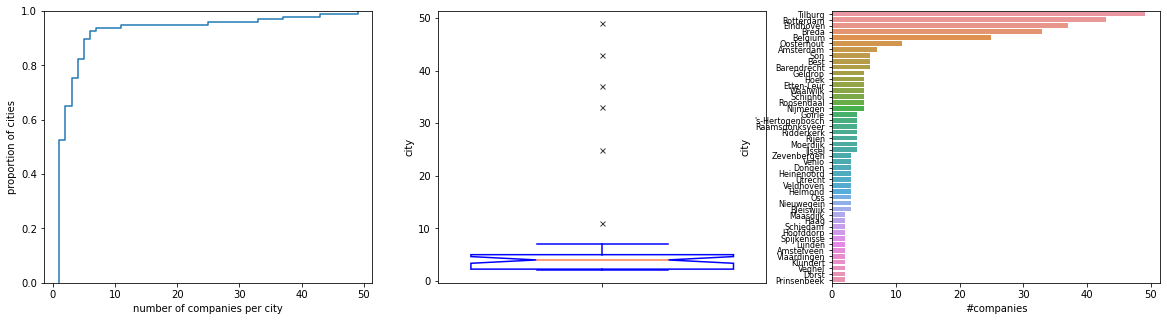

In [101]:
# number of companies per city
number_companies_per_city = Dataset[['name','city']].drop_duplicates()['city'].value_counts()#normalize = True)
fig,ax = plt.subplots(1,3, figsize = (20,5))
sns.ecdfplot(number_companies_per_city, ax = ax[0], palette='blue')
ax[0].set_xlabel('number of companies per city')
ax[0].set_ylabel('proportion of cities')
sns.boxplot(y = number_companies_per_city[number_companies_per_city>1], ax = ax[1],
           medianprops={"color": "coral"},notch=True,flierprops={"marker": "x"},
           boxprops={"facecolor": 'white','edgecolor':'b'},
          whiskerprops={"color": "blue"}, 
            capprops={"color": "blue"})
#,inner="stick",scale="count")
sub_set = number_companies_per_city[number_companies_per_city>1].reset_index()
sub_set.columns = ['city','#companies']
sns.barplot(y = sub_set['city'], 
            x = sub_set['#companies'], ax = ax[2])
ax[2].set_yticklabels(sub_set['city'].tolist(), fontsize = 8)
# number_companies_per_city.iloc[0:10]
number_companies_per_city[number_companies_per_city>1].describe()


In [102]:
# comment: would it be interesting to add the population size of the city
# insights: 
# -) companies appear in a total of 97 cities
# -) ~50% of the cities have 1 logistics company
# -) for the remaining a median of 5 logistics company per city can be found
# -) cities with the most number of logistics companies are 
# 'Tilburg','Rotterdam','Eindhoven','Breda','Belgium','Oosterhout','Amsterdam','Son','Best','Barendrecht'

# Number of reviews per company

In [117]:
total_number_of_companies = Dataset[['name','city']].value_counts().shape[0]
total_number_of_companies_with_review = Dataset[~Dataset['review_EN'].isnull()][['name','city']].value_counts().shape[0]
total_number_of_companies_with_stars = Dataset[~Dataset['avg_stars_num'].isnull()][['name','city']].value_counts().shape[0]

print(total_number_of_companies)
print(total_number_of_companies_with_review)
print(total_number_of_companies_with_review/total_number_of_companies)
print(total_number_of_companies_with_stars)
print(total_number_of_companies_with_stars/total_number_of_companies)

391
187
0.4782608695652174
232
0.5933503836317136


In [ ]:
# insights:
# -) total number of companies = 391
# -) total number of companies with review = 187 (0.478%)
# -) total number of companies with at least one star = 232 (0.593%)

In [131]:
number_reviews_per_company = Dataset[~Dataset['review_EN'].isnull()][['name','city']].value_counts().reset_index(name ='#reviews')

number_reviews_per_company['#reviews'].describe()
number_reviews_per_company[number_reviews_per_company['#reviews']>=20]

,name,city,#reviews
0,First Logistics B.V.,Nieuwegein,293
1,Van Spreuwel Transport,Eindhoven,288
2,NUNNER Logistics BV,Helmond,143
3,Claassen Logistics,Tilburg,135
4,ID Logistics Benelux,Tilburg,123
5,GVT Transport & Logistics Tilburg,Tilburg,117
6,A2 Logistics,'s-Hertogenbosch,107
7,Jan de Rijk Logistics HQ,Roosendaal,91
8,CTG Logistics BV,Vondelingenplaat,86
9,XPO Logistics (site Tilburg I),Tilburg,85
